In [1]:
import os
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv("ratings_Electronics.csv", names=['userid', 'productid', 'rating', 'timestamp'])  
ratings.head() 

,userid,productid,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
ratings.shape

(7824482, 4)

In [4]:
#Check for missing values
print('Number of missing values across columns: \n',ratings.isnull().sum())

Number of missing values across columns: 
 userid       0
productid    0
rating       0
timestamp    0
dtype: int64


In [5]:
ratings.dtypes

userid        object
productid     object
rating       float64
timestamp      int64
dtype: object

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userid       object
productid    object
rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [7]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(ratings.rating.min()))
print('Maximum rating is: %d' %(ratings.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


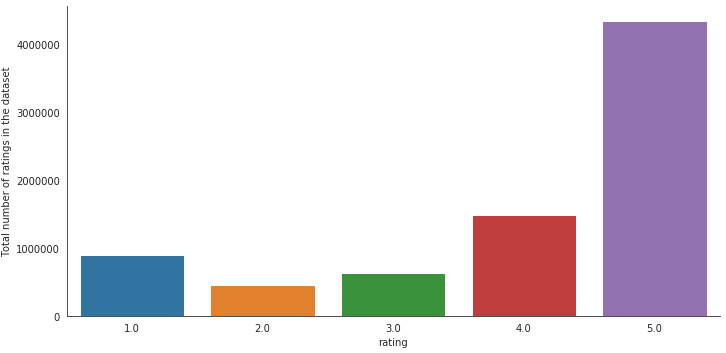

In [8]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=ratings, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings in the dataset")

In [9]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",ratings.shape[0])
print("Total No of Users   :", len(np.unique(ratings.userid)))
print("Total No of products  :", len(np.unique(ratings.productid)))

Total data 
--------------------------------------------------

Total no of ratings : 7824482
Total No of Users   : 4201696
Total No of products  : 476002


In [10]:
# We can Drop the Timestamp column as we do not have much use of it

ratings.drop(['timestamp'], axis=1,inplace=True)

In [11]:
#let's Analyse rating given by user 

no_of_rated_products_per_user = ratings.groupby(by='userid')['rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()


userid
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: rating, dtype: int64

In [12]:
no_of_rated_products_per_user.describe()

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: rating, dtype: float64

In [13]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

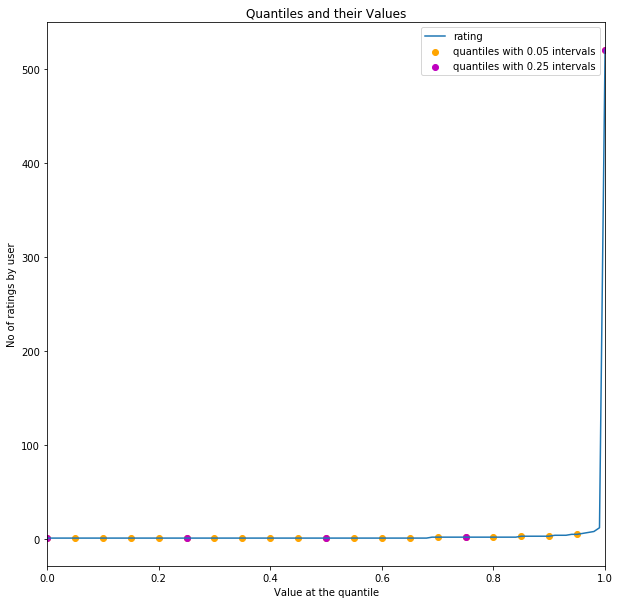

In [14]:
## quantiles calculations
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [15]:
print('Number of rated product by users only who has given 50 or more number of ratings : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )

Number of rated product by users only who has given 50 or more number of ratings : 1540



In [16]:
# creating new dataframe which contains users who has given 50 or more ratings

new_df=ratings.groupby("productid").filter(lambda x:x['rating'].count() >=50)


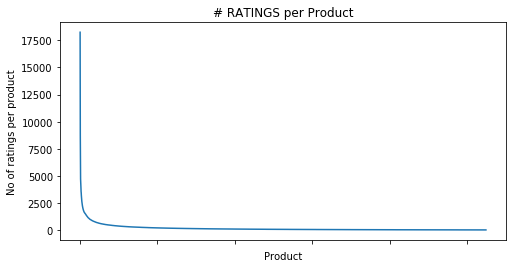

In [17]:
no_of_ratings_per_product = new_df.groupby(by='productid')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()


In [18]:
#Average rating of the product 

new_df.groupby('productid')['rating'].mean().head()

productid
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: rating, dtype: float64

In [19]:
new_df.groupby('productid')['rating'].mean().sort_values(ascending=False).head()

productid
B002E6R7NG    4.980392
B004I763AW    4.966667
B003J9QQWU    4.964286
B0043ZLFXE    4.955556
B000TMFYBO    4.953125
Name: rating, dtype: float64

In [20]:
#Total no of rating for product

new_df.groupby('productid')['rating'].count().sort_values(ascending=False).head()


productid
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: rating, dtype: int64

In [21]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productid')['rating'].mean())

In [22]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productid')['rating'].count())

In [23]:
ratings_mean_count.head()

,rating,rating_counts
productid,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [24]:
ratings_mean_count['rating_counts'].max()

18244

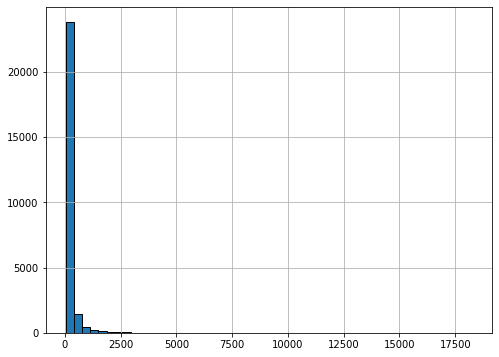

In [25]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

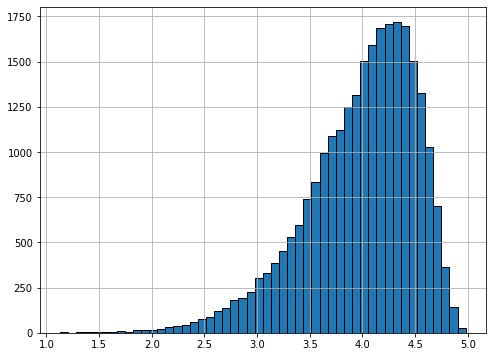

In [26]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

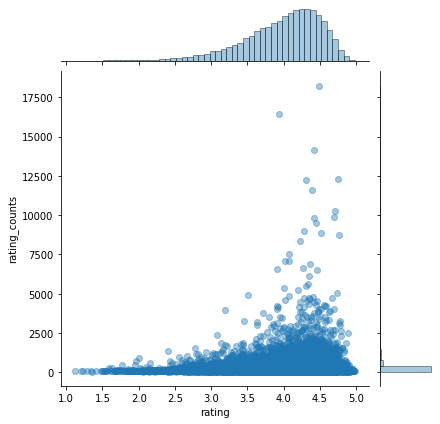

In [27]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

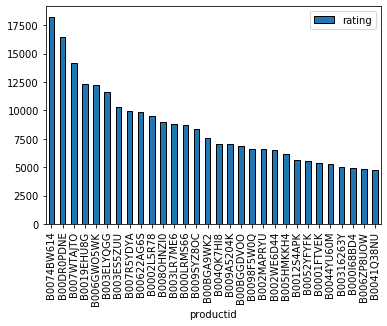

In [28]:
## Popularity Recommender
popular_products = pd.DataFrame(new_df.groupby('productid')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [29]:
### Collaberative filtering (Item-Item recommedation)

In [30]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [31]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [32]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [33]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [34]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [35]:
test_pred

[Prediction(uid='A3VURW93K8J9EZ', iid='B001DUQU0A', r_ui=5.0, est=4.122448979591836, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1X5EZN73CXAEA', iid='B008R6OPJQ', r_ui=5.0, est=4.8008872864826335, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A2XRRKO9JFOU1X', iid='B001URUQ7Y', r_ui=4.0, est=4.062666084355236, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A57QKCO2MWP2O', iid='B002UXQKFY', r_ui=5.0, est=4.062666084355236, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2701472A9TBLL', iid='B005FMKJ1I', r_ui=2.0, est=4.062666084355236, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ATOU63RU2ZZ2Y', iid='B006U1YVZ8', r_ui=4.0, est=4.052303860523039, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A16JVX4D0OG2KY', iid='B003VWYBC2', r_ui=2.0, est=3.6745562130177514, details={'actual_k': 0, 

In [36]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)


Item-based Model : Test Set
RMSE: 1.3335


1.3334560899557941

In [37]:
## Model-based collaborative filtering system

In [38]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='rating', index='userid', columns='productid', fill_value=0)
ratings_matrix.head()

productid,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userid,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
ratings_matrix.shape

(9832, 76)

In [40]:
X = ratings_matrix.T
X.head()

userid,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productid,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X.shape

(76, 9832)

In [42]:
X1 = X

In [43]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape


(76, 10)

In [44]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape


(76, 76)

In [45]:
X.index[75]

'B00000K135'

In [46]:
n = "B00000K135"

product_names = list(X.index)
product_ID = product_names.index(n)
product_ID


75

In [47]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

In [48]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removing the item already bought by the customer
Recommend.remove(n) 

Recommend[0:5]

['7214047977', '9573212919', '9625993428', '9983891212', 'B000001OM5']

In [49]:
##final we have above recommended items 

In [50]:
# so far we have done

In [51]:
# explored the given dataset by Rename column, plot histograms, find data characteristics
# took a subset of the dataset where keep the users only who has given 50 or more number of ratings
# Build Popularity Recommender model
# Split the data randomly into a train and test dataset
# Build Collaborative Filtering model ITEM-ITEM based
# Evaluated the model by RMSE 
# recommending top 5 products --> ['1400501776', '1400599997', '1400698987', '3744295508', '8862935293'] 
